f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни
Найти интервалы, на которых функция возрастает
Найти интервалы, на которых функция убывает
Построить график
Вычислить вершину
Определить промежутки, на котором f > 0
Определить промежутки, на котором f < 0



In [15]:
import sympy
from sympy.plotting import plot
from sympy import sin
from sympy import cos


In [52]:
x = sympy.Symbol('x')
f_x = - 12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
print(f_x)


-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30


In [53]:
for root in sympy.solve(f_x, x): # найти корни
    print(root)


NotImplementedError: multiple generators [x, sin(cos(x))]
No algorithms are implemented to solve equation -12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

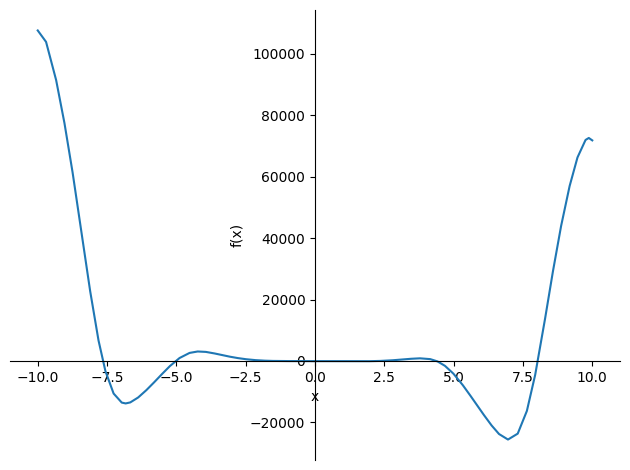

In [54]:
plot(f_x)

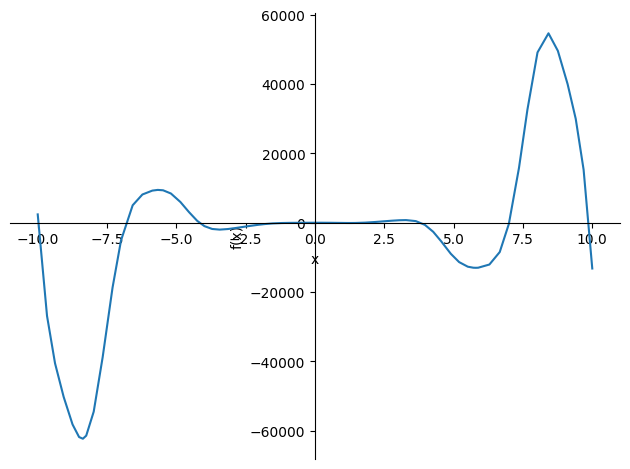

In [55]:
f_x_diff = f_x.diff()
plot(f_x_diff)

In [60]:
def calc_func_intervals(i, j, accuracy):
    i = i / accuracy
    j = j / accuracy
    keys = []
    for count in range(int(i), int(j)):
        func_1 = f_x.subs(x, count * accuracy)
        func_2 = f_x.subs(x, count * accuracy + accuracy)
        
        if func_1 * func_2 < 0:
            interval = [count * accuracy, count * accuracy + accuracy]
            keys.append(interval)
            print("x = {}, y = {} \n x = {}, y = {}".format(count, func_1, count + accuracy, func_2))
        #calc_func(i, i + 1, accuracy / 10)
    
    return keys



    
intervals = calc_func_intervals(-10, 10, 1)
print(intervals)

    
# for i in range(-10, 10):
#     func_1 = f_x_diff.subs(x, i)
#     func_2 = f_x_diff.subs(x, i + 1)
#     if func_1 * func_2 < 0:
#         calc_func(i, i + 1, accuracy / 10)
#     else:
#         print("f{} = {} \nf{} = {}".format(i, func_1, i + 1, func_2))
    

TypeError: 'Add' object is not callable

In [56]:
for i in range(4337820, 4337831):
    calc_x = i / 10000000
    print(calc_x, f_x_diff.subs(x, calc_x))

0.433782 1.19987279110171
0.4337821 1.19986720384309
0.4337822 1.19986161658269
0.4337823 1.19985602932053
0.4337824 1.19985044205660
0.4337825 1.19984485479089
0.4337826 1.19983926752342
0.4337827 1.19983368025418
0.4337828 1.19982809298317
0.4337829 1.19982250571039
0.433783 1.19981691843584


x = 0.43372829